In [20]:
import pandas as pd

# Load the dataset and assign a column name
file_path = 'Online_retail.csv'  # Update this path to your actual file location
data = pd.read_csv(file_path, header=None, names=['Itemsets'])
df=data
print(data.head(10))


                                            Itemsets
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...
5                                     low fat yogurt
6                     whole wheat pasta,french fries
7                           soup,light cream,shallot
8              frozen vegetables,spaghetti,green tea
9                                       french fries


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Example: Remove rows with missing values
df.dropna(inplace=True)


Itemsets    0
dtype: int64


In [5]:
df.isna().sum()

Itemsets    0
dtype: int64

In [6]:
df.describe()

,Itemsets
count,7501
unique,5176
top,cookies
freq,223


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Itemsets  7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [8]:
len(df)

7501

In [9]:
# Remove duplicate records
df.drop_duplicates(inplace=True)


In [11]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.4 MB 4.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 8.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from mlxtend.preprocessing import TransactionEncoder

# Split itemsets into lists
transactions = data['Itemsets'].apply(lambda x: x.split(','))

# Transform the dataset into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(df.head())


    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

In [13]:
from mlxtend.frequent_patterns import apriori

# Apply Apriori algorithm
min_support_threshold = 0.5  # Adjust this value as needed
frequent_itemsets = apriori(df, min_support=min_support_threshold, use_colnames=True)

print(frequent_itemsets)


Empty DataFrame
Columns: [support, itemsets]
Index: []


In [21]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules
min_confidence_threshold = 0.7  # Adjust this value as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)

# Sort rules by lift and print
rules = rules.sort_values(by='lift', ascending=False)
print(rules)

# Filter rules by lift greater than 1
filtered_rules = rules[rules['lift'] > 1]
print(filtered_rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Load the dataset and name the column
file_path = 'Online_retail.csv'  # Update this path to your actual file location
data = pd.read_csv(file_path, header=None, names=['Itemsets'])
print("Initial Data:\n", data.head())

# Step 2: Preprocess the data
transactions = data['Itemsets'].apply(lambda x: x.split(','))
print("Transactions:\n", transactions.head())

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("One-hot Encoded Data:\n", df.head())

# Step 3: Apply the Apriori algorithm to find frequent itemsets
min_support_threshold = 0.1  # Lowered the support threshold
frequent_itemsets = apriori(df, min_support=min_support_threshold, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets)

# Check if frequent itemsets DataFrame is empty
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering the support threshold.")
else:
    # Step 4: Generate and analyze association rules
    min_confidence_threshold = 0.5  # Lowered the confidence threshold
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)

    # Sort rules by lift and print
    rules = rules.sort_values(by='lift', ascending=False)
    print("Association Rules:\n", rules)

    # Filter rules by lift greater than 1
    filtered_rules = rules[rules['lift'] > 1]
    print("Filtered Rules:\n", filtered_rules)


Initial Data:
                                             Itemsets
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...
Transactions:
 0    [shrimp, almonds, avocado, vegetables mix, gre...
1                           [burgers, meatballs, eggs]
2                                            [chutney]
3                                    [turkey, avocado]
4    [mineral water, milk, energy bar, whole wheat ...
Name: Itemsets, dtype: object
One-hot Encoded Data:
     asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       Fals

In [22]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:

# Step 1: Load the dataset and give the column a name
file_path = 'Online_retail.csv'  # Update this path to your actual file location
data = pd.read_csv(file_path, header=None, names=['Itemsets'])
print("Initial Data:\n", data.head())


Initial Data:
                                             Itemsets
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...


In [24]:

# Step 2: Preprocess the data
transactions = data['Itemsets'].apply(lambda x: x.split(','))
print("Transactions:\n", transactions.head())

Transactions:
 0    [shrimp, almonds, avocado, vegetables mix, gre...
1                           [burgers, meatballs, eggs]
2                                            [chutney]
3                                    [turkey, avocado]
4    [mineral water, milk, energy bar, whole wheat ...
Name: Itemsets, dtype: object


In [25]:
# Use TransactionEncoder to transform the list of lists into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("One-hot Encoded Data:\n", df.head())

One-hot Encoded Data:
     asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white

In [26]:
# Step 3: Apply the Apriori algorithm to find frequent itemsets
min_support_threshold = 0.1  # Adjust the support threshold as needed
frequent_itemsets = apriori(df, min_support=min_support_threshold, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets)

Frequent Itemsets:
     support         itemsets
0  0.163845      (chocolate)
1  0.179709           (eggs)
2  0.170911   (french fries)
3  0.132116      (green tea)
4  0.129583           (milk)
5  0.238368  (mineral water)
6  0.174110      (spaghetti)


In [27]:
# Check if frequent itemsets DataFrame is empty
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering the support threshold.")
else:
    # Step 4: Generate and analyze association rules
    min_confidence_threshold = 0.5  # Adjust the confidence threshold as needed
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_threshold)

In [29]:
# Convert relevant columns to numeric data types
rules['lift'] = pd.to_numeric(rules['lift'])
rules['confidence'] = pd.to_numeric(rules['confidence'])
rules['support'] = pd.to_numeric(rules['support'])

In [30]:
    # Sort rules by lift and print
    rules = rules.sort_values(by='lift', ascending=False)
    print("Association Rules:\n", rules)

Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [31]:
    # Filter rules by lift greater than 1
    filtered_rules = rules[rules['lift'] > 1]
    print("Filtered Rules:\n", filtered_rules)

Filtered Rules:
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [34]:
# Step 5: Interpret the Rules
print("\nInterpreting the rules:")
if filtered_rules.empty:
    print("No rules found.")
else:
    for idx, rule in filtered_rules.iterrows():
        print(f"Rule: {rule['antecedents']} -> {rule['consequents']}")
        print(f"Support: {rule['support']}")
        print(f"Confidence: {rule['confidence']}")
        print(f"Lift: {rule['lift']}\n")



Interpreting the rules:
No rules found.


C:\Users\Reshma\AppData\Local\Temp\ipykernel_16752\156389051.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=filtered_rules, palette='viridis', sizes=(50, 500), alpha=0.7, legend=None)


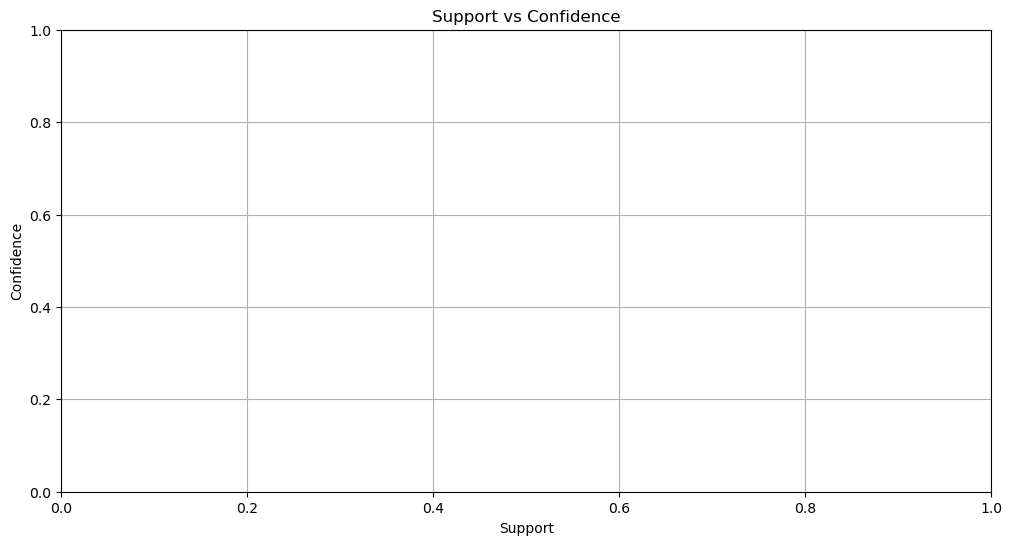

In [33]:
    # Step 6: Visualize the Rules
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=filtered_rules, palette='viridis', sizes=(50, 500), alpha=0.7, legend=None)
    plt.title('Support vs Confidence')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.grid(True)
    plt.show()


In [36]:
    # Plot top 10 rules by lift
    top_10_lift = filtered_rules.nlargest(10, 'lift')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='lift', y=top_10_lift.index, data=top_10_lift.reset_index(), palette='viridis')
    plt.title('Top 10 Rules by Lift')
    plt.xlabel('Lift')
    plt.ylabel('Index')
    plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1000x600 with 0 Axes>

In [35]:

    # Step 7: Actionable Insights
    print("\nActionable Insights:")
    # Example: If a rule has high confidence and lift, it suggests a strong association.
    # You can recommend marketing strategies based on these associations.
    for idx, rule in top_10_lift.iterrows():
        print(f"Rule: {rule['antecedents']} -> {rule['consequents']} has high lift of {rule['lift']}")
        # You can add more specific business recommendations here.


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1000x600 with 0 Axes>

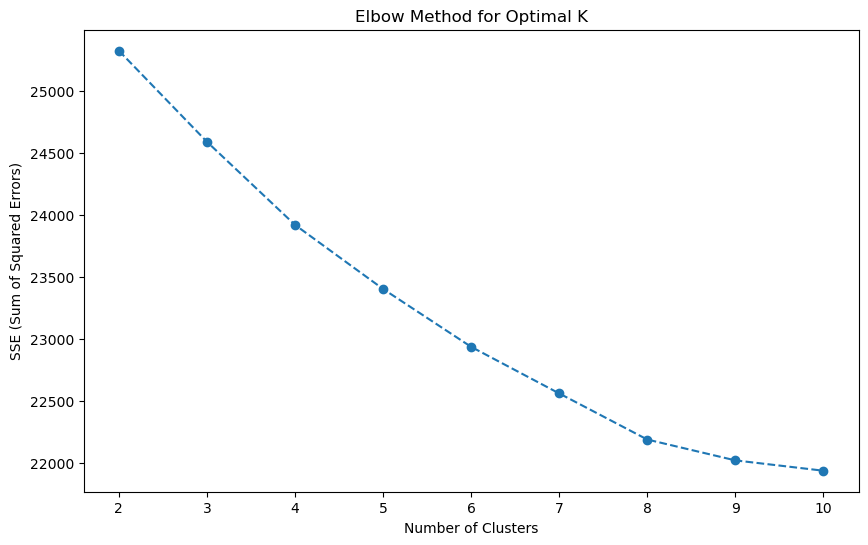

Silhouette Score: 0.07821224432917584


C:\Users\Reshma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1246: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if hue in numeric_cols:


KeyError: "None of [Int64Index([2, 1, 0, 0, 2, 0, 0, 0, 2, 0,\n            ...\n            0, 0, 0, 0, 0, 0, 1, 0, 0, 1],\n           dtype='int64', length=7501)] are in the [columns]"

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' contains your preprocessed data

# Step 2: Choose the Number of Clusters
# Example: Using the elbow method to find the optimal number of clusters
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(2, 11))
plt.show()

# Step 3: Apply K-Means Clustering
# Example: Assuming the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
cluster_labels = kmeans.labels_

# Step 4: Evaluate Clustering Performance
silhouette_avg = silhouette_score(df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Step 5: Visualize Clusters
# Example: Using pairplot to visualize clusters based on two features
sns.pairplot(df, hue=cluster_labels, palette='viridis')
plt.show()
